In [16]:
from __future__ import division, print_function, absolute_import
from past.builtins import basestring

import os

import pandas as pd
from matplotlib import pyplot as plt

from twip.constant import DATA_PATH

In [5]:
import matplotlib
from IPython.display import display, HTML 
%matplotlib inline
np = pd.np
display(HTML("<style>.container { width:100% !important; }</style>"))
pd.set_option('display.max_rows', 6)
pd.set_option('display.max_columns', 250)
%pprint

Pretty printing has been turned ON


In [5]:
df = pd.read_csv(os.path.join(DATA_PATH, 'cleaned_tweets.csv.gz'), low_memory=False)
rawlen = len(df)
df.drop_duplicates('id_str', keep='last', inplace=True)
rawlen - len(df)

10308

In [6]:
df.dtype


AttributeError: 'DataFrame' object has no attribute 'dtype'

In [8]:
# df.get_
df.get_dtype_counts()

bool        15
float64     51
int64       12
object     209
dtype: int64

In [9]:
dtypes = pd.Series([df[v].dtype for v in df.columns], index=df.columns)
dtypes

Unnamed: 0                   int64
id                           int64
coordinates_coordinates     object
                            ...   
user_url                    object
user_utc_offset            float64
user_verified                 bool
dtype: object

In [10]:
mask = [col for col in df.columns if df[col].dtype in (bool, float, np.dtype('int64'))]  # don't forget bool and int64 (not int)!
mask
numbers = df[mask]
numbers

Unnamed: 0                  id  favorite_count favorited  \
87              87  724276510626979840               0     False   
88              88  724276498249572352               0     False   
90              90  724276388325412866               1     False   
...            ...                 ...             ...       ...   
193375      193375  724275609858392066               0     False   
193376      193376  724275578879111169               0     False   
193377      193377  724275568871673857               0     False   

                    id_str  in_reply_to_status_id  in_reply_to_status_id_str  \
87      724276510626979840                    NaN                        NaN   
88      724276498249572352                    NaN                        NaN   
90      724276388325412866                    NaN                        NaN   
...                    ...                    ...                        ...   
193375  724275609858392066                    NaN                        NaN   
193376  724275578879111169                    NaN                        NaN   
193377  724275568871673857                    NaN                        NaN   

        in_reply_to_user_id  in_reply_to_user_id_str is_quote_status  lat  \
87                      NaN                      NaN           False  NaN   
88                      NaN                      NaN           False  NaN   
90                      NaN                      NaN           False  NaN   
...                     ...                      ...             ...  ...   
193375                  NaN                      NaN           False  NaN   
193376                  NaN                      NaN           False  NaN   
193377                  NaN                      NaN           False  NaN   

        lon  quoted_status_favorite_count  quoted_status_id  \
87      NaN                           NaN               NaN   
88      NaN                           NaN               NaN   
90      NaN                           NaN               NaN   
...     ...                           ...               ...   
193375  NaN                           NaN               NaN   
193376  NaN                           NaN               NaN   
193377  NaN                           NaN               NaN   

        quoted_status_id_str  quoted_status_retweet_count  \
87                       NaN                          NaN   
88                       NaN                          NaN   
90                       NaN                          NaN   
...                      ...                          ...   
193375                   NaN                          NaN   
193376                   NaN                          NaN   
193377                   NaN                          NaN   

        quoted_status_user_favourites_count  \
87                                      NaN   
88                                      NaN   
90                                      NaN   
...                                     ...   
193375                                  NaN   
193376                                  NaN   
193377                                  NaN   

        quoted_status_user_followers_count  quoted_status_user_friends_count  \
87                                     NaN                               NaN   
88                                     NaN                               NaN   
90                                     NaN                               NaN   
...                                    ...                               ...   
193375                                 NaN                               NaN   
193376                                 NaN                               NaN   
193377                                 NaN                               NaN   

        quoted_status_user_id  quoted_status_user_id_str  \
87                        NaN                        NaN   
88                        NaN                        NaN   
90           

In [11]:
numbers.to_csv(os.path.join(DATA_PATH, 'numbers.csv.gz'), compression='gzip')

In [6]:
numbers = pd.read_csv(os.path.join(DATA_PATH, 'numbers.csv.gz'), compression='gzip', engine='python')

In [7]:
[col for col in numbers.columns if 'follow' in col]

['quoted_status_user_followers_count',
 'retweeted_status_quoted_status_user_followers_count',
 'retweeted_status_user_followers_count',
 'user_followers_count']

In [11]:
numbers.columns = [col.replace(' ', '_') for col in numbers.columns]

In [12]:
cols = [col for col in numbers.columns if 'follow' in col]

['quoted_status_user_followers_count',
 'retweeted_status_quoted_status_user_followers_count',
 'retweeted_status_user_followers_count',
 'user_followers_count']

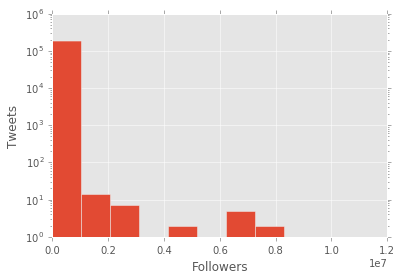

In [19]:
numbers.user_followers_count.hist()
plt.yscale('log', noposy='clip')
plt.ylabel('Tweets')
plt.xlabel('Followers')

In [20]:
# group by user ID before doing plots based on user stats like followers